<a href="https://colab.research.google.com/github/Hassanstar1/AutoML/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> Game playing </h1> </center>

In this homework, we will create chess-playing agent.

More specifically, we will:
1. Implement minimax algorithm.
2. Implement minimax with alpha beta prunning.
3. Apply these algorithms to solve checkmate puzzles in chess.
4. Make two agents play against each other.
5. Play against your own agent yourself.

<center> <h2> Setup </h2> </center>

#### Google colaboratory

Before getting started, get familiar with google colaboratory:
https://colab.research.google.com/notebooks/welcome.ipynb

This is a neat python environment that works in the cloud and does not require you to
set up anything on your personal machine
(it also has some built-in IDE features that make writing code easier).
Moreover, it allows you to copy any existing collaboratory file, alter it and share
with other people. In this homework, we will ask you to copy current colaboraty,
complete all the tasks and share your colaboratory notebook with us so
that we can grade it. We will also use colaboratory for the homework #4 so this
homework will prepare you for it.

#### Python-chess library

In order to avoid implementing the rules of the chess and visualization features we will use
a ```python-chess``` library. It is already a part of any google colaboratory environment so you do not
need to do any additional steps. We recommend you to go through a small tutorial on ```python-chess``` library:
https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/Programming%20a%20Chess%20Player.ipynb

#### Submission

Before you start working on this homework do the following steps:

1. Press __File > Save a copy in Drive...__ tab. This will allow you to have your own copy and change it.
2. Follow all the steps in this collaboratory file and write/change/uncomment code as necessary.
3. Do not forget to occasionally press __File > Save__ tab to save your progress.
4. After all the changes are done and progress is saved press __Share__ button (top right corner of the page), press __get shareable link__ and make sure you have the option __Anyone with the link can view__ selected.
5. Paste the link into your submission pdf file so that we can view it and grade.

Epoch 0, Loss: 442.4081612245612
Epoch 100, Loss: 1.7867799502318797
Epoch 200, Loss: 0.7596203729042699
Epoch 300, Loss: 0.486700631191088
Epoch 400, Loss: 0.4104746891708494
Epoch 500, Loss: 0.38560918408871414
Epoch 600, Loss: 0.3742194724138004
Epoch 700, Loss: 0.36642886969720684
Epoch 800, Loss: 0.3596613641624505
Epoch 900, Loss: 0.3532439878589516


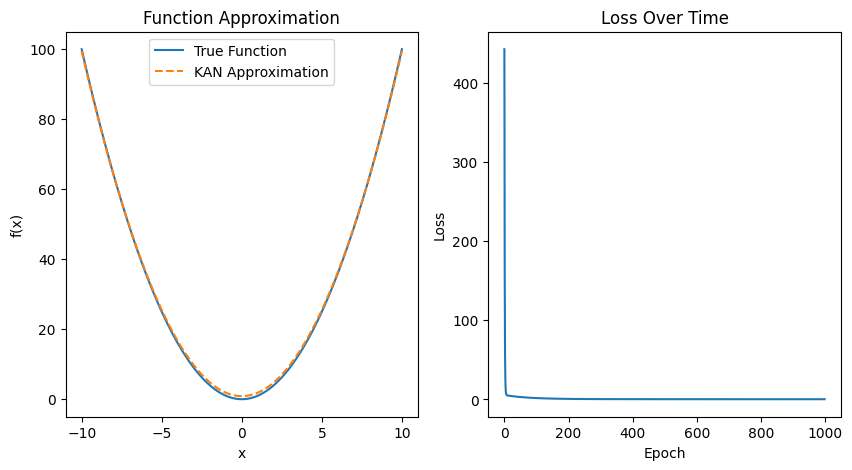

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x_data = np.linspace(-10, 10, 400)
y_data = x_data**2  # Our target function f(x) = x^2

# Initialize random coefficients for a simple polynomial model
np.random.seed(0)  # For reproducibility
coefficients = np.random.randn(3)  # A quadratic polynomial ax^2 + bx + c

def polynomial(x, coeffs):
    """ Evaluates a polynomial at x with given coefficients. """
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

def compute_loss(y_true, y_pred):
    """ Computes mean squared error between true and predicted values. """
    return ((y_true - y_pred)**2).mean()

def update_coefficients(x, y, coeffs, lr=0.0001):
    """ Naive update function to adjust coefficients based on gradient descent. """
    predictions = polynomial(x, coeffs)
    errors = y - predictions
    # Gradient calculation for a quadratic polynomial
    grads = [
        -2 * (errors * x**2).mean(),
        -2 * (errors * x).mean(),
        -2 * errors.mean()
    ]
    # Update coefficients
    coeffs -= lr * np.array(grads)
    return coeffs

# Training loop
losses = []
for epoch in range(1000):
    coefficients = update_coefficients(x_data, y_data, coefficients)
    loss = compute_loss(y_data, polynomial(x_data, coefficients))
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, label='True Function')
plt.plot(x_data, polynomial(x_data, coefficients), label='KAN Approximation', linestyle='--')
plt.title('Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x_data = np.linspace(-10, 10, 400)
y_data = x_data**2

# MLP structure: 1 input, hidden layer with 10 neurons, 1 output
np.random.seed(0)
weights_hidden = np.random.randn(10, 1)  # 10 neurons in the hidden layer
biases_hidden = np.random.randn(10, 1)
weights_output = np.random.randn(10, 1)
bias_output = np.random.randn(1)

def relu(x):
    return np.maximum(0, x)

def mlp_forward(x, weights_hidden, biases_hidden, weights_output, bias_output):
    hidden_layer = relu(np.dot(weights_hidden, x) + biases_hidden)
    output = np.dot(weights_output.T, hidden_layer) + bias_output
    return output

def compute_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

def train_mlp(x, y, weights_hidden, biases_hidden, weights_output, bias_output, epochs=1000, lr=0.0001):
    losses = []
    x = x.reshape(1, -1)  # Ensure x is a row vector
    for epoch in range(epochs):
        for i in range(x.shape[1]):  # Iterate over each sample
            xi = x[:, i:i+1]  # Column vector
            yi = y[i:i+1]  # Scalar value

            # Forward pass
            hidden_layer = relu(np.dot(weights_hidden, xi) + biases_hidden)
            yi_pred = np.dot(weights_output.T, hidden_layer) + bias_output

            # Backpropagation
            error = yi - yi_pred
            d_output = error
            d_weights_output = np.dot(hidden_layer, d_output.T)
            d_bias_output = d_output

            d_hidden_layer = np.dot(weights_output, d_output) * (hidden_layer > 0)
            d_weights_hidden = np.dot(d_hidden_layer, xi.T)
            d_biases_hidden = d_hidden_layer

            # Parameters update
            weights_output += lr * d_weights_output
            bias_output += lr * d_bias_output.sum(axis=1, keepdims=True)  # Sum across samples
            weights_hidden += lr * d_weights_hidden
            biases_hidden += lr * d_biases_hidden

        # Loss computation for the whole dataset to monitor progress
        y_pred = mlp_forward(x, weights_hidden, biases_hidden, weights_output, bias_output)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_hidden, biases_hidden, weights_output, bias_output, losses


# Train the MLP
wh, bh, wo, bo, mlp_losses = train_mlp(x_data.reshape(1, -1), y_data, weights_hidden, biases_hidden, weights_output, bias_output)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, label='True Function')
y_pred_mlp = mlp_forward(x_data.reshape(1, -1), wh, bh, wo, bo).flatten()
plt.plot(x_data, y_pred_mlp, label='MLP Approximation', linestyle='--')
plt.title('MLP Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_losses)
plt.title('MLP Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x_data = np.linspace(-10, 10, 400)
y_data = x_data**2 + 10 * np.sin(x_data)  # Our target function f(x)


In [15]:
# Polynomial coefficients (simple KAN-like approach)
np.random.seed(0)
coefficients = np.random.randn(3)  # Quadratic polynomial as before

def polynomial(x, coeffs):
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

def update_coefficients(x, y, coeffs, lr=0.0001, epochs=1000):
    losses = []
    for epoch in range(epochs):
        predictions = polynomial(x, coeffs)
        errors = y - predictions
        # Gradient calculation for a quadratic polynomial
        grads = [
            -2 * (errors * x**2).mean(),
            -2 * (errors * x).mean(),
            -2 * errors.mean()
        ]
        coeffs -= lr * np.array(grads)
        loss = ((y - polynomial(x, coeffs))**2).mean()
        losses.append(loss)
    return coeffs, losses

coefficients, kan_losses = update_coefficients(x_data, y_data, coefficients)


In [13]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def mlp_forward(x, weights_hidden, biases_hidden, weights_output, bias_output):
    x = x.reshape(-1, 1)  # Ensure x is a column vector
    hidden_layer = relu(np.dot(weights_hidden, x) + biases_hidden)
    output = np.dot(weights_output, hidden_layer) + bias_output  # Remove transpose if weights_output is already (1, 10)
    return output


def train_mlp(x, y, weights_hidden, biases_hidden, weights_output, bias_output, epochs=1000, lr=0.0001):
    x = x.reshape(-1, 1)  # Make sure x is in column vector form
    y = y.reshape(-1, 1)  # Make sure y is also a column vector
    losses = []

    for epoch in range(epochs):
        for i in range(len(x)):  # Iterate over each sample
            xi = x[i].reshape(1, -1)  # Row vector for input
            yi = y[i]  # Scalar to array

            # Forward pass
            hidden_layer = relu(np.dot(weights_hidden, xi.T) + biases_hidden)  # xi.T to match dimensions
            yi_pred = np.dot(weights_output, hidden_layer) + bias_output

            # Calculate error
            error = yi_pred - yi

            # Backpropagation
            d_output = error
            d_weights_output = np.dot(d_output, hidden_layer.T)
            d_bias_output = d_output

            d_hidden_layer = np.dot(weights_output.T, d_output) * (hidden_layer > 0)
            d_weights_hidden = np.dot(d_hidden_layer, xi)  # Ensure xi is not transposed here
            d_biases_hidden = d_hidden_layer

            # Update weights and biases
            weights_output -= lr * d_weights_output
            bias_output -= lr * d_bias_output
            weights_hidden -= lr * d_weights_hidden
            biases_hidden -= lr * np.sum(d_biases_hidden, axis=1, keepdims=True)

        # Compute loss for monitoring
        predictions = np.array([mlp_forward(x[j, :], weights_hidden, biases_hidden, weights_output, bias_output) for j in range(len(x))]).flatten()
        loss = np.mean((y - predictions)**2)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights_hidden, biases_hidden, weights_output, bias_output, losses

# Parameters
np.random.seed(0)
x_data = np.linspace(-10, 10, 400)
y_data = x_data**2 + 10 * np.sin(x_data)
weights_hidden = np.random.randn(10, 1)
biases_hidden = np.random.randn(10, 1)
weights_output = np.random.randn(1, 10)  # Changed from (10, 1) to (1, 10) for correct dimensions
bias_output = np.random.randn(1, 1)  # Explicitly 2D for consistency

# Training the MLP
wh, bh, wo, bo, mlp_losses = train_mlp(x_data, y_data, weights_hidden, biases_hidden, weights_output, bias_output)





Epoch 0, Loss: 1548.9593443004467
Epoch 100, Loss: 1869.9553098846275
Epoch 200, Loss: 1870.2596378471192
Epoch 300, Loss: 1861.373496012227
Epoch 400, Loss: 1853.1947028969857
Epoch 500, Loss: 1847.0876700418878
Epoch 600, Loss: 1843.346715778015
Epoch 700, Loss: 1840.3810416592494
Epoch 800, Loss: 1838.1493146199412
Epoch 900, Loss: 1836.627234039435


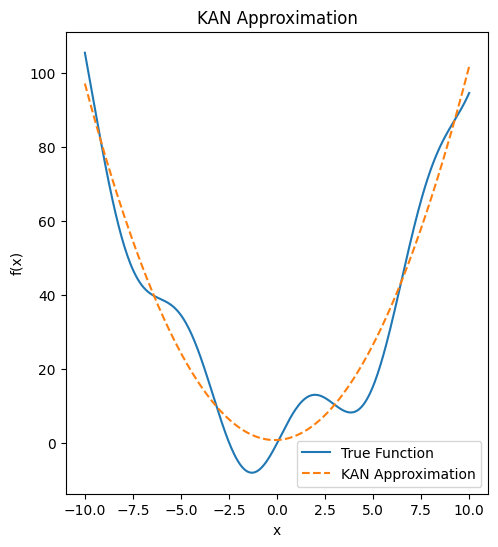

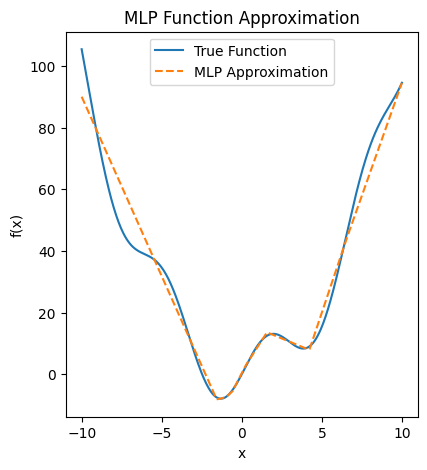

<Figure size 640x480 with 0 Axes>

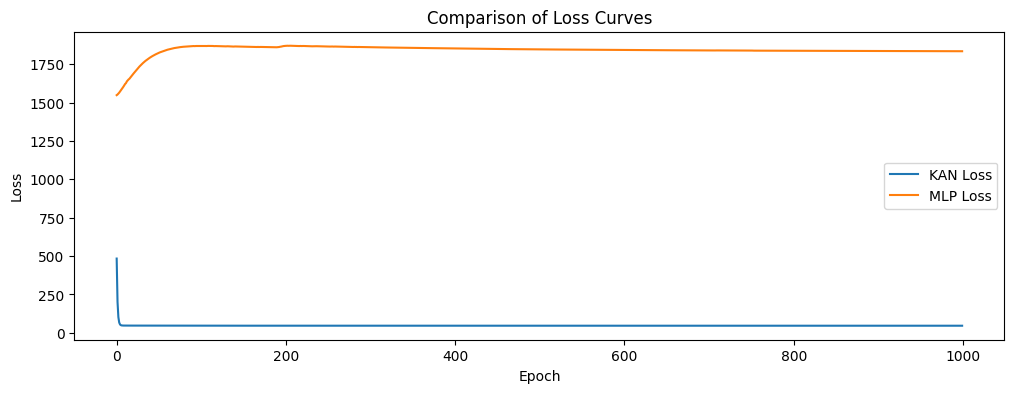

In [17]:
plt.figure(figsize=(12, 6))

# Plotting KAN-like results
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, label='True Function')
plt.plot(x_data, polynomial(x_data, coefficients), label='KAN Approximation', linestyle='--')
plt.title('KAN Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

import matplotlib.pyplot as plt

# Assuming the weights and biases (wh, bh, wo, bo) are already trained and available
# Make sure x_data is reshaped to (400, 1) where each row is a sample and there's one feature per row
x_data_reshaped = x_data.reshape(-1, 1)  # Reshape to (-1, 1) to make it (400, 1)

# Now, predict using the mlp_forward function across all samples
# We'll use a loop to apply the forward pass to each sample individually
y_pred_mlp = np.array([mlp_forward(x_data_reshaped[i], wh, bh, wo, bo) for i in range(x_data_reshaped.shape[0])]).flatten()

# Plotting MLP results
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.subplot(1, 2, 2)
plt.plot(x_data, y_data, label='True Function')
plt.plot(x_data, y_pred_mlp, label='MLP Approximation', linestyle='--')
plt.title('MLP Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


plt.tight_layout()
plt.show()

# Comparing loss curves
plt.figure(figsize=(12, 4))
plt.plot(kan_losses, label='KAN Loss')
plt.plot(mlp_losses, label='MLP Loss')
plt.title('Comparison of Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, Loss: 3153.9039587336983
Epoch 1000, Loss: nan

<ipython-input-18-a9cc15dcb99c>:44: RuntimeWarning: overflow encountered in multiply
  -2 * np.mean(error * sin_coeffs[0] * x * np.cos(sin_coeffs[1] * x))  # Derivative w.r.t sin_coeffs[1]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)



Epoch 2000, Loss: nan
Epoch 3000, Loss: nan
Epoch 4000, Loss: nan
Epoch 5000, Loss: nan
Epoch 6000, Loss: nan
Epoch 7000, Loss: nan
Epoch 8000, Loss: nan
Epoch 9000, Loss: nan


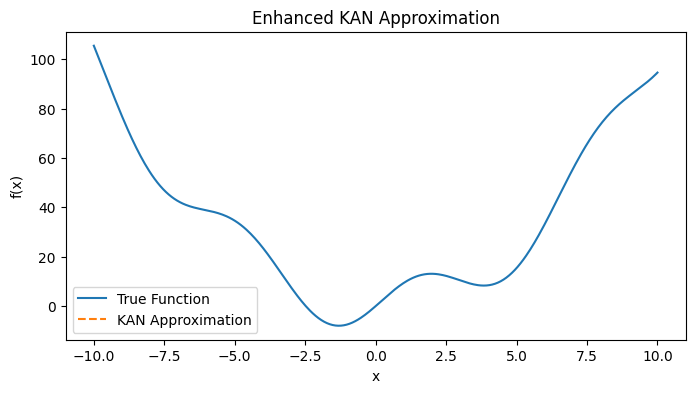

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x_data = np.linspace(-10, 10, 400)
y_data = x_data**2 + 10 * np.sin(x_data)  # Target function

# Basis functions
def polynomial_basis(x, coeffs):
    # Polynomial: coeffs[0]*x^2 + coeffs[1]*x + coeffs[2]
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

def sinusoidal_basis(x, coeffs):
    # Sinusoidal: coeffs[0]*sin(coeffs[1]*x)
    return coeffs[0] * np.sin(coeffs[1] * x)

# Model function combining the bases
def kan_model(x, poly_coeffs, sin_coeffs):
    return polynomial_basis(x, poly_coeffs) + sinusoidal_basis(x, sin_coeffs)

# Loss function
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Gradient descent to optimize coefficients
def optimize_coefficients(x, y, poly_coeffs, sin_coeffs, lr=0.001, epochs=10000):
    for epoch in range(epochs):
        # Predictions
        y_pred = kan_model(x, poly_coeffs, sin_coeffs)

        # Errors
        error = y - y_pred

        # Gradient for polynomial coefficients
        grad_poly = [
            -2 * np.mean(error * x**2),  # Derivative w.r.t poly_coeffs[0]
            -2 * np.mean(error * x),     # Derivative w.r.t poly_coeffs[1]
            -2 * np.mean(error)          # Derivative w.r.t poly_coeffs[2]
        ]

        # Gradient for sinusoidal coefficients
        grad_sin = [
            -2 * np.mean(error * np.sin(sin_coeffs[1] * x)),  # Derivative w.r.t sin_coeffs[0]
            -2 * np.mean(error * sin_coeffs[0] * x * np.cos(sin_coeffs[1] * x))  # Derivative w.r.t sin_coeffs[1]
        ]

        # Update coefficients
        poly_coeffs -= lr * np.array(grad_poly)
        sin_coeffs -= lr * np.array(grad_sin)

        # Optionally print loss
        if epoch % 1000 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss}")

    return poly_coeffs, sin_coeffs

# Initial coefficients
poly_coeffs = np.random.randn(3)  # Random initial polynomial coefficients
sin_coeffs = np.random.randn(2)  # Random initial sinusoidal coefficients

# Optimize coefficients
poly_coeffs, sin_coeffs = optimize_coefficients(x_data, y_data, poly_coeffs, sin_coeffs)

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x_data, y_data, label='True Function')
plt.plot(x_data, kan_model(x_data, poly_coeffs, sin_coeffs), label='KAN Approximation', linestyle='--')
plt.title('Enhanced KAN Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


In [20]:
import numpy as np

# Define basic functions
def linear(x, params):
    return params[0] * x + params[1]

def squared(x, params):
    return params[0] * (x**2) + params[1]

def sinusoidal(x, params):
    return params[0] * np.sin(params[1] * x)

# Helper function to compute derivatives for each function type
def derivative_func(x, y, y_pred, func, params):
    if func == linear:
        # Derivative w.r.t a and b in a*x + b
        d_a = -2 * (y - y_pred) * x
        d_b = -2 * (y - y_pred)
        return np.array([np.mean(d_a), np.mean(d_b)])
    elif func == squared:
        # Derivative w.r.t a and b in a*x^2 + b
        d_a = -2 * (y - y_pred) * (x**2)
        d_b = -2 * (y - y_pred)
        return np.array([np.mean(d_a), np.mean(d_b)])
    elif func == sinusoidal:
        # Derivative w.r.t a and omega in a*sin(omega*x)
        d_a = -2 * (y - y_pred) * np.sin(params[1] * x)
        d_omega = -2 * (y - y_pred) * params[0] * x * np.cos(params[1] * x)
        return np.array([np.mean(d_a), np.mean(d_omega)])

# Initialize parameters
functions = [linear, squared, sinusoidal]
params = [np.random.randn(2) for _ in functions]  # each function has two parameters

# Training data
x_data = np.linspace(-1, 1, 100)
y_data = 3 * x_data**2 + 2 * np.sin(x_data)  # Example function

# Training loop
learning_rate = 0.01
epochs = 1000
for epoch in range(epochs):
    y_pred = np.sum([func(x_data, param) for func, param in zip(functions, params)], axis=0)
    loss = np.mean((y_data - y_pred)**2)

    for i, func in enumerate(functions):
        grad = derivative_func(x_data, y_data, y_pred, func, params[i])
        params[i] -= learning_rate * grad

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 1.2384751644059135
Epoch 100, Loss: 0.23685611031256787
Epoch 200, Loss: 0.10709735499019267
Epoch 300, Loss: 0.06981709141371967
Epoch 400, Loss: 0.049165700589933685
Epoch 500, Loss: 0.03511017686422577
Epoch 600, Loss: 0.025239602889411156
Epoch 700, Loss: 0.018280376666296963
Epoch 800, Loss: 0.01337104807753162
Epoch 900, Loss: 0.009907165992884177


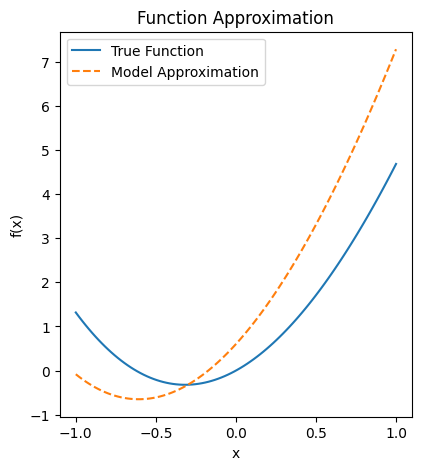

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions again (for completeness)
def linear(x, params):
    return params[0] * x + params[1]

def squared(x, params):
    return params[0] * (x**2) + params[1]

def sinusoidal(x, params):
    return params[0] * np.sin(params[1] * x)

# Combine the functions in the model
def model(x, params):
    return sum(func(x, param) for func, param in zip(params['functions'], params['parameters']))

# Training data
x_data = np.linspace(-1, 1, 100)
y_true = 3 * x_data**2 + 2 * np.sin(x_data)  # True function

# Parameters and setup
params = {
    'functions': [linear, squared, sinusoidal],
    'parameters': [np.array([2.0, 0.5]), np.array([3.0, 0.1]), np.array([2.0, 1.0])]  # Example coefficients
}

# Prediction from the model
y_pred = model(x_data, params)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_true, label='True Function')
plt.plot(x_data, y_pred, label='Model Approximation', linestyle='--')
plt.title('Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Plotting the loss if we have it (assuming loss data is collected during training)
# This section assumes you have an array `losses` collected during training.
# If you haven't collected losses, you can comment this part or adjust accordingly.
# losses = [...]  # You should collect this data during training.
# plt.subplot(1, 2, 2)
# plt.plot(losses)
# plt.title('Loss Over Time')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.show()


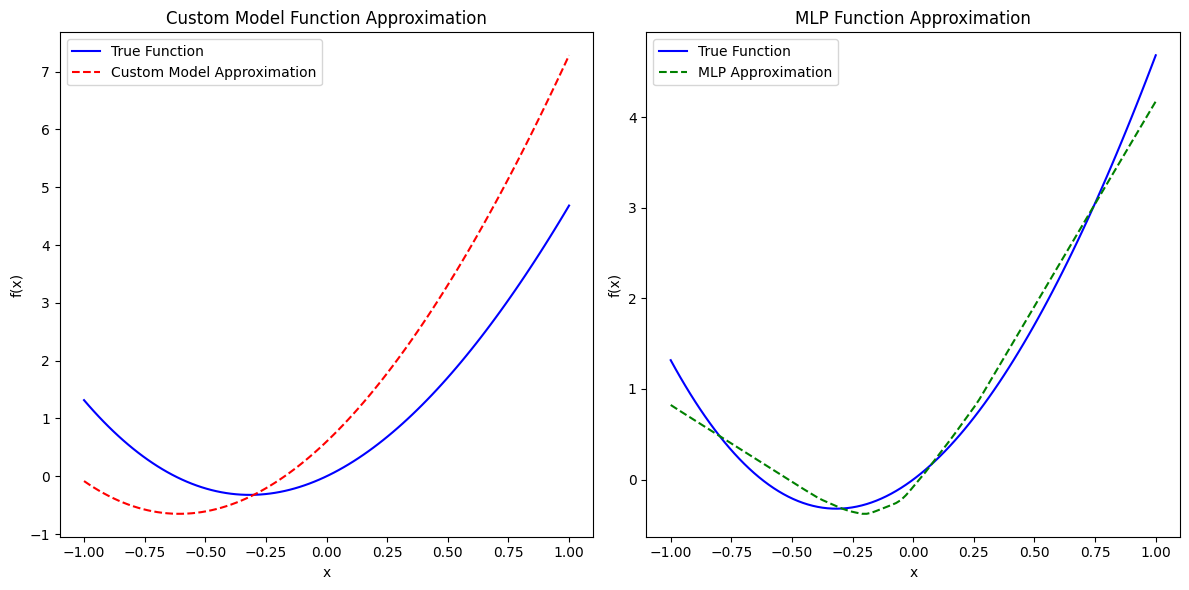

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
def linear(x, params):
    return params[0] * x + params[1]

def squared(x, params):
    return params[0] * (x**2) + params[1]

def sinusoidal(x, params):
    return params[0] * np.sin(params[1] * x)

def model(x, params):
    return sum(func(x, param) for func, param in zip(params['functions'], params['parameters']))
x_data = np.linspace(-1, 1, 100).reshape(-1, 1)  # Reshape for sklearn compatibility
y_true = 3 * x_data**2 + 2 * np.sin(x_data)  # True function, reshaped implicitly
params = {
    'functions': [linear, squared, sinusoidal],
    'parameters': [np.array([2.0, 0.5]), np.array([3.0, 0.1]), np.array([2.0, 1.0])]
}
y_pred_custom = model(x_data.flatten(), params)  # Flatten x_data for custom model processing
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=5000, random_state=1)
mlp.fit(x_data, y_true.ravel())  # Fit model to data
y_pred_mlp = mlp.predict(x_data)  # Predict using the fitted model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_true, label='True Function', color='blue')
plt.plot(x_data, y_pred_custom, 'r--', label='Custom Model Approximation')
plt.title('Custom Model Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_data, y_true, label='True Function', color='blue')
plt.plot(x_data, y_pred_mlp, 'g--', label='MLP Approximation')
plt.title('MLP Function Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def train_mlp(x, y, weights_hidden, biases_hidden, weights_output, bias_output, epochs=1000, lr=0.0001):
    losses = []
    x = x.reshape(1, -1)  # Ensure x is a row vector
    for epoch in range(epochs):
        for i in range(x.shape[1]):  # Iterate over each sample
            xi = x[:, i:i+1]  # Column vector
            yi = y[i:i+1]  # Scalar value

            # Forward pass
            hidden_layer = relu(np.dot(weights_hidden, xi) + biases_hidden)
            yi_pred = np.dot(weights_output.T, hidden_layer) + bias_output

            # Backpropagation
            error = yi - yi_pred
            d_output = error
            d_weights_output = np.dot(hidden_layer, d_output.T)
            d_bias_output = d_output

            d_hidden_layer = np.dot(weights_output, d_output) * (hidden_layer > 0)
            d_weights_hidden = np.dot(d_hidden_layer, xi.T)
            d_biases_hidden = d_hidden_layer

            # Parameters update
            weights_output += lr * d_weights_output
            bias_output += lr * d_bias_output.sum(axis=1, keepdims=True)  # Sum across samples
            weights_hidden += lr * d_weights_hidden
            biases_hidden += lr * d_biases_hidden

        # Loss computation for the whole dataset to monitor progress
        y_pred = mlp_forward(x, weights_hidden, biases_hidden, weights_output, bias_output)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_hidden, biases_hidden, weights_output, bias_output, losses


<center> <h2> Problem statement </h2> </center>

In this work we will try to find the best move given current position of figures on the board,
assuming that we play against a perfect player.

(It is useful to know the rules of chess before you start:
https://en.wikipedia.org/wiki/Rules_of_chess)

Before we start to play the full game of chess, we will have a look at checkmate puzzles (Read more about it here:
https://en.wikipedia.org/wiki/Chess_problem#Types_of_problems).

The task is basically to find a combination of moves that will lead to checkmate against any defence.
This is a good way to check our agent before letting it play the full game. You will also have to
provide solutions to our puzzles to get credit for the asignment.

You can also try solving some puzzles on your own to better understand the problem:
https://www.chess.com/forum/view/more-puzzles/300-checkmate-puzzles-puzzles-1---50

Let us load one of the puzzles and visualize the initial board position:

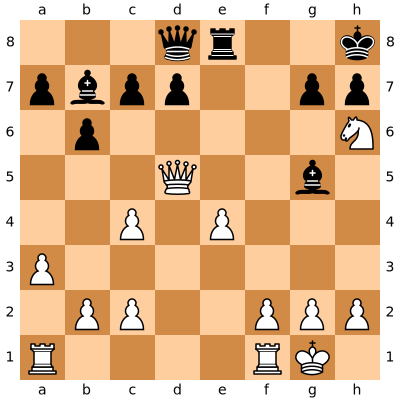

In [ ]:
import chess

board = chess.Board(fen='3qr2k/pbpp2pp/1p5N/3Q2b1/2P1P3/P7/1PP2PPP/R4RK1 w - - 0 1')

# Display the board
board

<center> <h2> Evaluation function </h2> </center>

If you remember from the lecture, minimax traverses the game tree until it reaches
the leaf node that represents terminal state of the game (which in chess
usually means checkmate or draw). After reaching the terminal state, the
utility function is applied and the score value is returned. For example, $1$ white wins,
$0$ for draw, $-1$ black wins. Unfortunately, given the branching factor of the game, evaluating all
possible moves is not currently possible.

To get around this, we decide to limit the depth of our game tree to a certain number
and evaluate the leaf nodes using an evaluation function (see lecture slides) that estimates the
desirability of a position. Since we limit the game tree depth, some leaf nodes have a certain outcome (like checkmate or draw) while others do not. When we do not have an exact outcome we use the fuction to estimate
the outcome of the position by counting the number of pawns, rooks, queens etc. while also assigning different
weight to figures based on their importance.

Below you can see an implementation of the evaluation function and evaluate our board:

In [ ]:
def evaluate_board(board):

    # Pawn -- 10 points
    # Knight -- 30 points
    # Bishop -- 30 points
    # Rook -- 50 points
    # Queen -- 90 points
    # Checkmte -- 9000 points

    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))

    score = 10*(wp-bp)+30*(wn-bn)+30*(wb-bb)+50*(wr-br)+90*(wq-bq)

    if board.is_checkmate():

        if board.turn:
            score = -9000
        else:
            score = 9000

    return score

evaluate_board(board)

40

Positive value returned by our function means that white have an advantage over black
based on our evaluation function.

Now let us find the best move by only looking one step ahead:

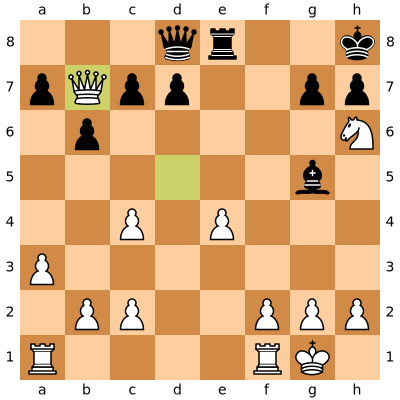

In [ ]:
import math


def find_best_move_shallow(board, white=True):

    best_value = -math.inf
    best_move = None

    for move in board.legal_moves:

        board.push(move)

        if white:
            current_value = evaluate_board(board)
        else:
            current_value = -evaluate_board(board)

        if current_value > best_value:
            best_value = current_value
            best_move = move
        board.pop()

    return best_move

board_copy = board.copy()

best_move = find_best_move_shallow(board_copy)

board_copy.push(best_move)
board_copy

Not a really good move because our horse will be captured by enemy's bishop and
our agent can not see this since it only looks one step ahead.


<center> <h2> Minimax algorithm </h2> </center>

To be able to look more than one step ahead we have to model our opponents move.
Minimax assumes that our opponent makes best moves and, therefore, the opponent tries to minimize
our possible gains while we try to maximize ours (see lecture slides).

Below we provide you with our partial implementation of minimax. It has a parameter ```depth```
which specifies the depth of our game tree. Uncomment the correct lines and run the code cell.

# of Nodes evaluated:  55002
Best value found:  9000


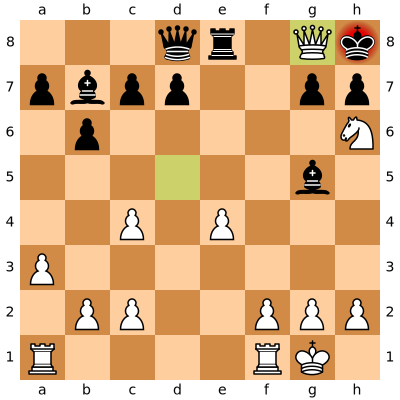

In [ ]:
# Global variable used to count the number
# of nodes we explored. Will be used to compare
# naive minimax with its alpha beta pruning version.
move_count = 0


def minimax(board,
            depth,
            white=True,
            is_max_branch=True,
            ):

    global move_count
    move_count = move_count + 1


    # Check if we reached the depth limit or
    # if the node is terminal (does not have any possible legal moves)
    if depth == 0 or (len(list(board.legal_moves)) == 0):


        if white:

            return evaluate_board(board)
        else:

            return -evaluate_board(board)


    # Max branch
    if is_max_branch:

        #best_move_value = math.inf
        # Or
        #best_move_value = -math.inf

        for move in board.legal_moves:

            board.push(move)

#             best_move_value = min(best_move_value, minimax(board,
#                                                            depth=depth-1,
#                                                            white=white,
#                                                            is_max_branch=False
#                                                            ))
              # OR
#             best_move_value = max(best_move_value, minimax(board,
#                                                            depth=depth-1,
#                                                            white=white,
#                                                            is_max_branch=False
#                                                            ))

            board.pop()

        return best_move_value

    # Min branch

    #best_move_value = math.inf
    # OR
    #best_move_value = -math.inf

    for move in board.legal_moves:

        board.push(move)

#         best_move_value = min(best_move_value, minimax(board,
#                                                        depth=depth-1,
#                                                        white=white,
#                                                        is_max_branch=True
#                                                        ))
                                     #OR
#         best_move_value = max(best_move_value, minimax(board,
#                                                        depth=depth-1,
#                                                        white=white,
#                                                        is_max_branch=True
#                                                        ))


        board.pop()

    return best_move_value



def find_best_move_minimax(board,
                           white=True):

    global move_count
    move_count = 0

    best_value = -math.inf
    best_move = None


    for move in board.legal_moves:

        board.push(move)
        current_value = minimax(board,
                                depth=2,
                                white=white,
                                is_max_branch=False)

        if current_value > best_value:
            best_value = current_value
            best_move = move
        board.pop()

    print("# of Nodes evaluated: ", move_count)
    print("Best value found: ", best_value)

    return best_move

board_copy = board.copy()

move = find_best_move_minimax(board_copy)

board_copy.push(move)

board_copy

We can see that based on the output of our algorithm found a solution to our puzzle (since it found a path to the solution that gives us 9000 which is checkmate). We have also showed the first step towards the best
solution. We will see the whole solution in the next cell.

Now let us see the whole solution. We will define some functions to present the whole game animation:

In [ ]:
import time
from IPython.display import display, HTML, clear_output

import random


def who(player):
    return "White" if player == chess.WHITE else "Black"

def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"

def play_game(player1, player2, board, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    global move_count
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s, moves searched %s" % (
                       len(board.move_stack), name, uci, board_stop, move_count)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

def player_white(board):

    return find_best_move_minimax(board).uci()

def player_black(board):

    return find_best_move_minimax(board, False).uci()

play_game(player_white, player_black, board.copy(), pause=1.0)

checkmate: White wins!


(True,
 'checkmate: White wins!',
 Board('3q2rk/pbpp1Npp/1p6/6b1/2P1P3/P7/1PP2PPP/R4RK1 b - - 1 2'))

As you can see the solution was successfully found. And moreover, there is no way black
can avoid the checkmate if white make the right moves. Here we solved a puzzle that had a solution
in two moves but there are puzzles that require to find solution in greater number of steps, so the
depth of our game tree should be bigger. Moreover, during a real game bigger depth of a game tree means better
results. But naive minimax is too expensive. Therefore, we implement minimax with alpha beta prunning next.

<center> <h2> Minimax algorithm with alpha beta pruning </h2> </center>

If you remember from the lecture slides alpha beta prunning allows to prune some nodes
of the game tree that are known to be not optimal. During the tree traversal we collect the information
on upper and lower bound for each node and this allows to avoid exploring some branches of the game tree.
Below we implement the alpha beta prunning type of minimax algorithm. The complexity of this algorithm is $O(b^m)$ in the worst case (same as naive minimax) and $O(b^\frac{m}{2})$ in the best case. Therefore, we can have a twice deeper game tree while spending the same amount of computation. Again, you are required to uncomment the right parts and run the code.

# of Nodes evaluated:  11605
Best value found:  9000


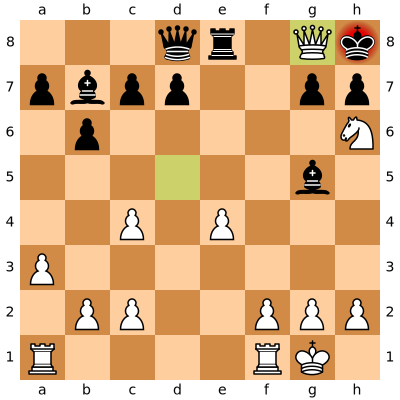

In [ ]:
move_count = 0


def minimax_alpha_beta_prunning(board,
                                depth,
                                alpha=-math.inf,
                                beta=math.inf,
                                is_max_branch=True,
                                white=True):

    global move_count

    move_count = move_count + 1

    if depth == 0 or (len(list(board.legal_moves)) == 0):


        if white:

            return evaluate_board(board)
        else:

            return -evaluate_board(board)


    # Max branch
    if is_max_branch:

        #best_move_value = -math.inf
        # OR
        #best_move_value = math.inf

        for move in board.legal_moves:

            board.push(move)

#             best_move_value = max(best_move_value, minimax_alpha_beta_prunning(board,
#                                                                                alpha=alpha,
#                                                                                beta=beta,
#                                                                                depth=depth-1,
#                                                                                is_max_branch=False,
#                                                                                white=white)
#                                  )
#             alpha = max(alpha, best_move_value)
              # OR
#             best_move_value = min(best_move_value, minimax_alpha_beta_prunning(board,
#                                                                                alpha=alpha,
#                                                                                beta=beta,
#                                                                                depth=depth-1,
#                                                                                is_max_branch=False,
#                                                                                white=white)
#                                  )
#             alpha = min(alpha, best_move_value)



            if best_move_value >= beta:
                board.pop()
                break

            board.pop()

        return best_move_value

    # Min branch

    #best_move_value = math.inf
    # OR
    #best_move_value = -math.inf

    for move in board.legal_moves:

        board.push(move)

#         best_move_value = min(best_move_value, minimax_alpha_beta_prunning(board,
#                                                                            alpha=alpha,
#                                                                            beta=beta,
#                                                                            depth=depth-1,
#                                                                            is_max_branch=True,
#                                                                            white=white)
#                              )
#         beta = min(beta, best_move_value)
          # OR
#         best_move_value = min(best_move_value, minimax_alpha_beta_prunning(board,
#                                                                            alpha=alpha,
#                                                                            beta=beta,
#                                                                            depth=depth-1,
#                                                                            is_max_branch=True,
#                                                                            white=white)
#                              )
#         beta = min(beta, best_move_value)



        if best_move_value <= alpha:
            board.pop()
            break

        board.pop()

    return best_move_value


def find_best_move_minimax_alpha_beta_prunning(board, white=True):

    global move_count
    move_count = 0

    best_value = -math.inf
    best_move = None


    for move in board.legal_moves:

        board.push(move)
        current_value = minimax_alpha_beta_prunning(board,
                                depth=2,
                                white=white,
                                is_max_branch=False)

        if current_value > best_value:
            best_value = current_value
            best_move = move
        board.pop()

    print("# of Nodes evaluated: ", move_count)
    print("Best value found: ", best_value)

    return best_move

board_copy = board.copy()

move = find_best_move_minimax_alpha_beta_prunning(board_copy)

board_copy.push(move)

board_copy

As we can see the same solution was found but just more efficiently (pay attention to the number
of evaluated nodes).

Again, let us see the whole game:

In [ ]:
def player_white(board):

    return find_best_move_minimax_alpha_beta_prunning(board).uci()

def player_black(board):

    return find_best_move_minimax_alpha_beta_prunning(board, False).uci()

play_game(player_white, player_black, board.copy(), pause=1.0)

checkmate: White wins!


(True,
 'checkmate: White wins!',
 Board('3q2rk/pbpp1Npp/1p6/6b1/2P1P3/P7/1PP2PPP/R4RK1 b - - 1 2'))

Now, you are requried to solve two other chess puzzles and display the final solution in the notebook,
so that we can grade it.

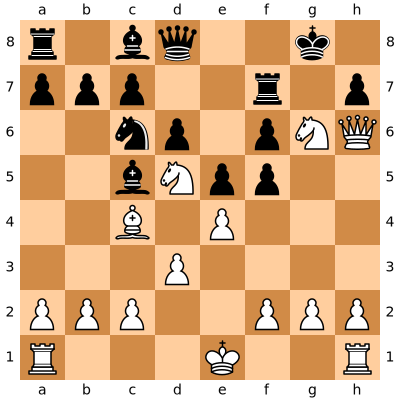

In [ ]:
# Solve this
board_2 = chess.Board(fen='r1bq2k1/ppp2r1p/2np1pNQ/2bNpp2/2B1P3/3P4/PPP2PPP/R3K2R w KQ - 0 1')
board_2

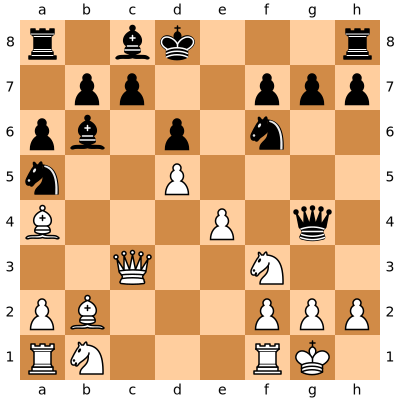

In [ ]:
# Solve this
board_3 = chess.Board(fen='r1bk3r/1pp2ppp/pb1p1n2/n2P4/B3P1q1/2Q2N2/PB3PPP/RN3RK1 w - - 0 1')
board_3

<center> <h2> Full Game </h2> </center>

Now you can play against your agent or you can make two agents play against each other.
Try changing the depth of the game tree and see how it changes the agent's behaviour.
This is an optional part and it will not be graded.

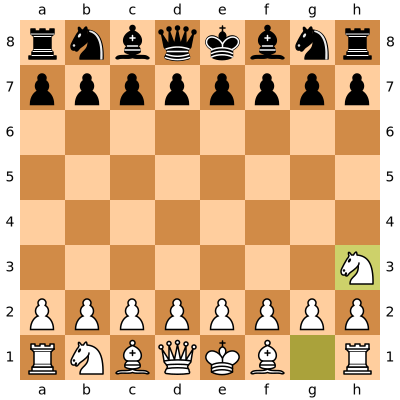

(None,
 'Game interrupted!',
 Board('rnbqkbnr/pppppppp/8/8/8/7N/PPPPPPPP/RNBQKB1R b KQkq - 1 1'))

In [ ]:
def human_player(board):
    display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci


def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

play_game(player_white, human_player, chess.Board(), pause=1.0)

<center> <h2> Self Play </h2> </center>


In [ ]:
play_game(player_white, player_black, chess.Board(), pause=2.0)

draw: claim


(None,
 'draw: claim',
 Board('r1b3kr/ppppbppp/2n1p3/6PR/8/8/PPPPPPP1/R1BK1B2 b - - 10 13'))